In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [3]:
!pip install git+https://bitbucket.org/jsteven5/tasplot.git
import tasplot

  Cloning https://bitbucket.org/jsteven5/tasplot.git to c:\users\penny\appdata\local\temp\pip-req-build-87sshlzn
  Resolved https://bitbucket.org/jsteven5/tasplot.git to commit dcd1d9e1f57d8b8554e6d76f6ab83ccc299903e2
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://bitbucket.org/jsteven5/tasplot.git 'C:\Users\penny\AppData\Local\Temp\pip-req-build-87sshlzn'


In [4]:
out=pt.import_excel(r'../ArcPL_Dec2022.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
Cpx_Glass=out['my_input']
notinLEPR=Cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(Cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
newMask=newMask.fillna(False)

mask_1GPa=Cpx_Glass['P_kbar_x']<=17
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)
Cpx_cat_fracs=pt.calculate_clinopyroxene_liquid_components(cpx_comps=myCpxs1, liq_comps=myLiquids1)




C:\Users\penny\AppData\Local\Temp\ipykernel_3216\2168294765.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(Cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [5]:
Cpx_Glass_plot=Cpx_Glass.loc[Press_new]
Cpx_comps=pt.calculate_clinopyroxene_components(cpx_comps=Cpx_Glass_plot)
Cpx_Glass_plot['NaK']=Cpx_Glass_plot['Na2O_Liq']+Cpx_Glass_plot['K2O_Liq']
Cpx_Glass_plot['Mgno_Cpx']=Cpx_comps['Mgno_Cpx']

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\AppData\Local\Temp\ipykernel_3216\3977377607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cpx_Glass_plot['NaK']=Cpx_Glass_plot['Na2O_Liq']+Cpx_Glass_plot['K2O_Liq']
C:\Users\penny\AppData\Local\Temp\ipykernel_3216\3977377607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

<Axes.ArtistList of 0 texts>


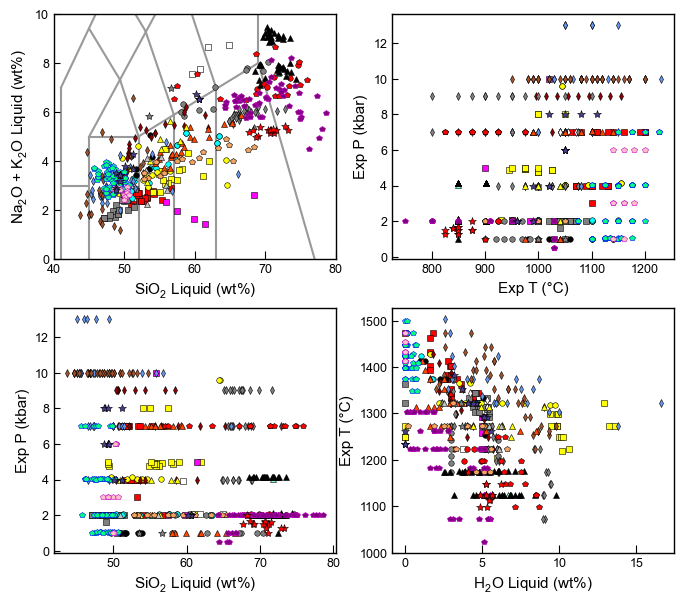

In [9]:
## Setting up loop

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,7))
face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'yellow', 'orange')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '*', '*')
nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6)
tasplot.add_LeMaitre_fields(ax1)

for t in ax1.texts[:]:
    t.remove()
    #ax1.remove_artist(t)
print(ax1.texts)
ax1.set_ylim([0, 10])
ax1.set_xlim([40, 80])



for ref in Cpx_Glass_plot['Citation_x'].unique():
    
    ax1.plot(
            Cpx_Glass_plot['SiO2_Liq'].loc[Cpx_Glass_plot['Citation_x']==ref],
         Cpx_Glass_plot['NaK'].loc[Cpx_Glass_plot['Citation_x']==ref],
   marker=markers[nmarkers],  ms=ms[ncolor], mew=0.4,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )   
    
    
    ax2.plot(Cpx_Glass_plot['T_K_x'].loc[Cpx_Glass_plot['Citation_x']==ref]-273.14,
         Cpx_Glass_plot['P_kbar_x'].loc[Cpx_Glass_plot['Citation_x']==ref],
   marker=markers[nmarkers], linewidth=0.0001,  ms=ms[ncolor], mew=0.4,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,   label=ref ) 

    ax3.plot(
         Cpx_Glass_plot['SiO2_Liq'].loc[Cpx_Glass_plot['Citation_x']==ref],
        Cpx_Glass_plot['P_kbar_x'].loc[Cpx_Glass_plot['Citation_x']==ref],
   marker=markers[nmarkers], linewidth=0.0001,  ms=ms[ncolor], mew=0.4,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,   label=ref ) 

    ax4.plot(
         Cpx_Glass_plot['H2O_Liq'].loc[Cpx_Glass_plot['Citation_x']==ref],
        Cpx_Glass_plot['T_K_x'].loc[Cpx_Glass_plot['Citation_x']==ref],
   marker=markers[nmarkers], linewidth=0.0001,  ms=ms[ncolor], mew=0.4,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,   label=ref ) 
    
    
    
    ncolor+=1
    nmarkers+=1    
    
ax1.set_xlabel('SiO$_2$ Liquid (wt%)')
ax1.set_ylabel('Na$_2$O + K$_2$O Liquid (wt%)')

ax2.set_xlabel('Exp T (°C)')
ax2.set_ylabel('Exp P (kbar)')

ax3.set_xlabel('SiO$_2$ Liquid (wt%)')
ax3.set_ylabel('Exp P (kbar)')

ax4.set_xlabel('H$_2$O Liquid (wt%)')
ax4.set_ylabel('Exp T (°C)')
#ax1.legend(fontsize=2)
fig.savefig('TasDiagram.png', dpi=300)
